In [143]:
import numpy as np

'''
generate sequences on the basis of given probabilties
'''

n=10000

initial_p={"A":0.5,"B":0.5}

transition_p_froma={"A":0.9999,"B":0.0001}
transition_p_fromb={"A":0.0001,"B":0.9999}

emission_p_froma={".":0.949,"a":0.05,"b":0.001}
emission_p_fromb={".":0.949,"a":0.001,"b":0.05}

ip_np=np.array(list(initial_p.values()))
tp_np=np.array([list(transition_p_froma.values()),
                list(transition_p_fromb.values())])
ep_np=np.array([list(emission_p_froma.values()),
                list(emission_p_fromb.values())])


In [144]:
hid_seq=np.random.choice(list(initial_p.keys()), p=list(initial_p.values()))

for i in range(n):
    if hid_seq[-1]=="A":
        step=np.random.choice(list(transition_p_froma.keys()), p=list(transition_p_froma.values()))
        hid_seq+=step
    else:
        step=np.random.choice(list(transition_p_fromb.keys()), p=list(transition_p_fromb.values()))
        hid_seq+=step

print(hid_seq)

#hid_seq="BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [145]:
emission_seq=""

for hidden_state in hid_seq:
    if hidden_state=="A":
        emission=np.random.choice(list(emission_p_froma.keys()), p=list(emission_p_froma.values()))
        emission_seq+=emission
    else:
        emission=np.random.choice(list(emission_p_fromb.keys()), p=list(emission_p_fromb.values()))
        emission_seq+=emission

print(emission_seq)
#emission_seq="bb...b......bb.b.b.b...bb.bb....b.baa...a.a..aaabaaaa.aaa....aa.aa....a.aa..a......a.a.aaa.........aa"



..........a..a..a...............a..........................................................a...............a................a........................................................a.................................................................................a.a........................................................................a....................................a................b.........a............a..........................a...a......................................................................a.................a..............a................a.................................................................a.........................a.................................................................................a....a..................................a...............a.............aa..........a................a........a....................b.a............a...................a..........a............a.............a.a.a..................................b........a........

In [159]:
'''
test viterbi algorithm
'''

def viterbi(y, A, B, pi):
    """
        viterbi algorithm
        :param y: observation sequence
        :param A: the transition matrix
        :param B: the emission matrix
        :param pi: the initial probability distribution
    """
    N = B.shape[0]
    x_seq = np.zeros([N, 0])
    V = np.log(B[:, y[0]]) + np.log(pi)
    
    # forward to compute the optimal value function V
    for y_ in y[1:]:
        _V = np.log(np.tile(B[:, y_], reps=[N, 1]).T) + np.log(A.T) + np.tile(V, reps=[N, 1])
        x_ind = np.argmax(_V, axis=1)
        x_seq = np.hstack([x_seq, np.c_[x_ind]])

        V = _V[np.arange(N), x_ind]

        print(V)
        
    x_T = np.argmax(V)

    # backward to fetch optimal sequence
    x_seq_opt, i = np.zeros(x_seq.shape[1]+1), x_seq.shape[1]
    prev_ind = x_T
    while i >= 0:
        x_seq_opt[i] = prev_ind
        i -= 1
        prev_ind = x_seq[int(prev_ind), i]
    return x_seq_opt




In [147]:
hidden_index=[]
for h in hid_seq:
    if h=="A":
        hidden_index.append(0)
    else:
        hidden_index.append(1)
emission_index=[]
for e in emission_seq:
    if e==".":
        emission_index.append(0)
    elif e=="a":
        emission_index.append(1)
    else:
        emission_index.append(2)



In [160]:
#print(emission_index)

o=viterbi(emission_index, tp_np, ep_np, ip_np)

predicted_hidden_index = o.tolist()
predicted_hidden_index = [int(x) for x in predicted_hidden_index]

#print(hidden_index)
#print(predicted_hidden_index)

accuracy = sum([1 for i in range(len(hidden_index)) if hidden_index[i] == predicted_hidden_index[i]]) / len(hidden_index)
print(accuracy)

[-0.79794015 -0.79794015]
[-0.85038663 -0.85038663]
[-0.90283312 -0.90283312]
[-0.9552796 -0.9552796]
[-1.00772609 -1.00772609]
[-1.06017257 -1.06017257]
[-1.11261906 -1.11261906]
[-1.16506554 -1.16506554]
[-1.21751203 -1.21751203]
[-4.21334431 -8.12536731]
[-4.26579079 -8.1778138 ]
[-4.31823728 -8.23026028]
[ -7.31406956 -15.13811557]
[ -7.36651604 -15.19056205]
[ -7.41896253 -15.24300854]
[-10.41479481 -22.15086382]
[-10.46724129 -19.67748166]
[-10.51968778 -19.72992814]
[-10.57213426 -19.78237463]
[-10.62458075 -19.83482111]
[-10.67702723 -19.8872676 ]
[-10.72947372 -19.93971409]
[-10.7819202  -19.99216057]
[-10.83436669 -20.04460706]
[-10.88681317 -20.09705354]
[-10.93925966 -20.14950003]
[-10.99170615 -20.20194651]
[-11.04415263 -20.254393  ]
[-11.09659912 -20.30683948]
[-11.1490456  -20.35928597]
[-11.20149209 -20.41173245]
[-14.19732437 -27.31958774]
[-14.24977085 -23.46001122]
[-14.30221734 -23.5124577 ]
[-14.35466382 -23.56490419]
[-14.40711031 -23.61735067]
[-14.45955679 -23.

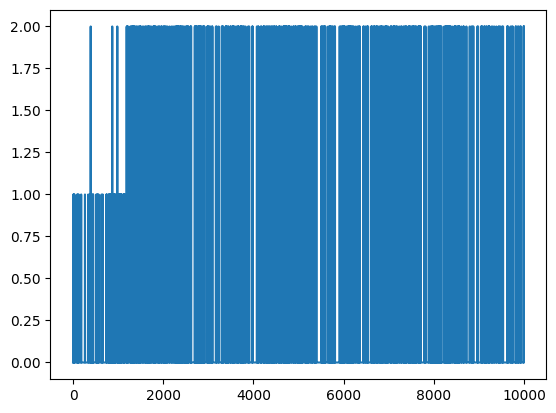

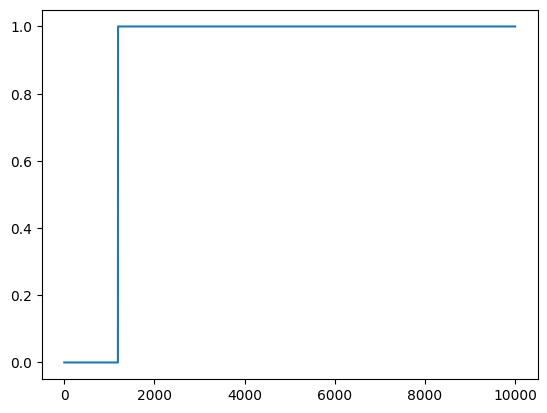

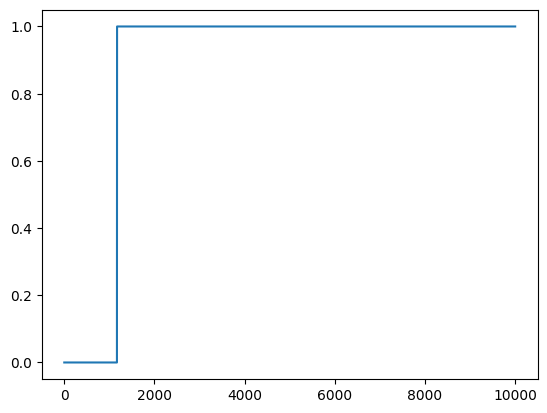

In [158]:
import matplotlib.pyplot as plt

#plt.plot(hidden_index, label="true")
plt.plot(emission_index, label="emission")
plt.show()
plt.plot(predicted_hidden_index, label="predicted")
plt.show()
plt.plot(hidden_index, label="true")
plt.show()